In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check python version
import sys
sys.version

'3.7.10 (default, May  3 2021, 02:48:31) \n[GCC 7.5.0]'

In [ ]:
import pandas as pd

In [ ]:
!pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1MB 1.6MB/s eta 0:11:47tcmalloc: large alloc 1147494400 bytes == 0x564a93d84000 @  0x7fb2b8e74615 0x564a5a6e9cdc 0x564a5a7c952a 0x564a5a6ecafd 0x564a5a7ddfed 0x564a5a760988 0x564a5a75b4ae 0x564a5a6ee3ea 0x564a5a7607f0 0x564a5a75b4ae 0x564a5a6ee3ea 0x564a5a75d32a 0x564a5a7dee36 0x564a5a75c853 0x564a5a7dee36 0x564a5a75c853 0x564a5a7dee36 0x564a5a75c853 0x564a5a7dee36 0x564a5a8613e1 0x564a5a7c16a9 0x564a5a72ccc4 0x564a5a6ed559 0x564a5a7614f8 0x564a5a6ee30a 0x564a5a75c3b5 0x564a5a75b7ad 0x564a5a6ee3ea 0x564a5a75c3b5 0x564a5a6ee30a 0x564a5a75c3b5
     |█████████████████               | 1055.7MB 2.3MB/s eta 0:06:52tcmalloc: large alloc 1434370048 bytes == 0x564ad83da000 @  0x7fb2b8e74615 0x564a5a6e9cdc 0x564a5a7c952a 0x564a5a6ecafd 0x564a5a7ddfed 0x564a5a760988 0x564a5a75b4ae 0x564a5a6ee3ea 0x564a5a7607f0 0x564a5a75b4ae 0x564a5a6ee3ea 0x564a5a75d32a 0x564a5a7dee36 0x564a5a75c853 0

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 7.6MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
# Standard output is '/device:GPU:0'

''

In [ ]:
from fastai.vision.all import *

In [ ]:
import fastai 
fastai.__version__

'2.4'

In [14]:
from time import time

In [10]:
path= '/content/drive/MyDrive/Colab Notebooks/Plant/'

In [11]:
df = pd.read_csv(path+'train_comp.csv')
df.head()

,image,labels
0,Compressed_800113bb65efe69e.jpg,healthy
1,Compressed_8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,Compressed_80070f7fb5e2ccaa.jpg,scab
3,Compressed_80077517781fb94f.jpg,scab
4,Compressed_800cbf0ff87721f8.jpg,complex


In [12]:
#splitter
splitter = RandomSplitter(valid_pct=0.33, seed=2021)

# DataBlock
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=ColReader('image', pref=str(path+'train_images/') ),
                   get_y=ColReader('labels', label_delim=' '), 
                   splitter=splitter,
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(mult=2, size=224, flip_vert=True))

dls = dblock.dataloaders(df)

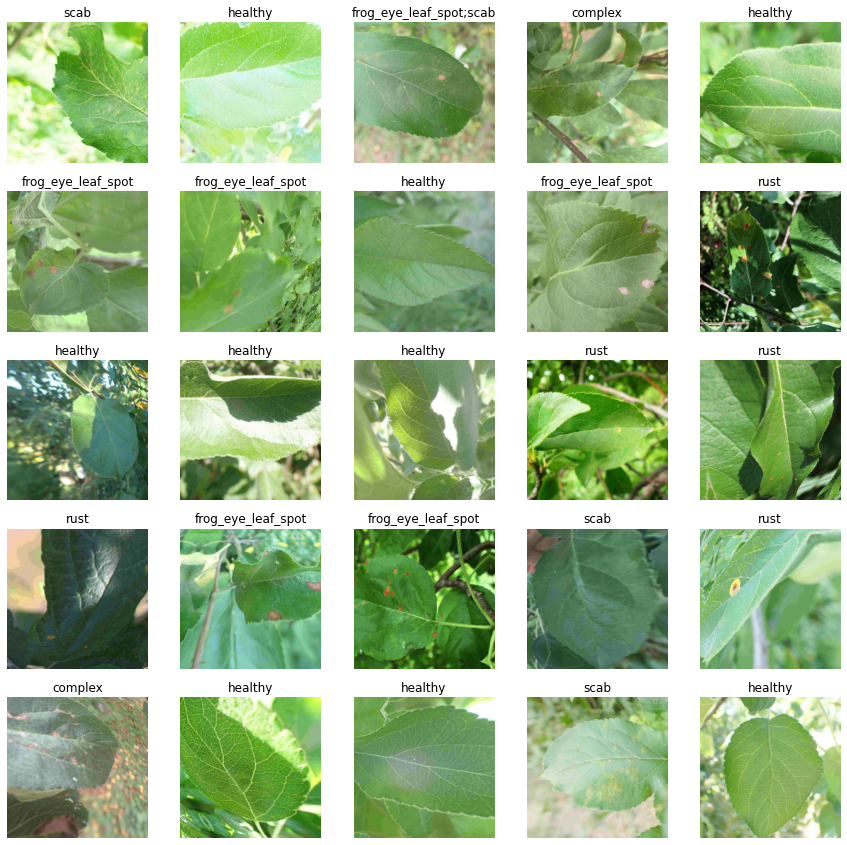

In [ ]:
dls.show_batch(max_n=25)

In [16]:
debut= time()
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))
duree1 = time()- debut
print("durée 1 du training (en secondes) =", duree1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



durée 1 du training (en secondes) = 1.9394712448120117


SuggestedLRs(valley=tensor(0.0012))

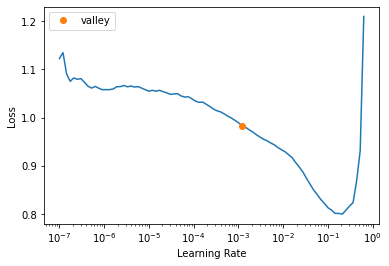

In [ ]:
debut= time()
learn.lr_find()

In [ ]:
duree2 = time()- debut
print("durée 2 : pour trouver le meilleur learning rate  (en secondes) =", duree2)

durée 2 : pour trouver le meilleur learning rate  (en secondes) = 3576.1517412662506


In [17]:
debut= time()
learn.fine_tune(2, 4e-2)
duree3 = time()- debut

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.254026,0.167581,0.936212,2:27:41


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.190869,0.152743,0.943640,2:43:46
1,0.144334,0.106505,0.957086,2:51:33


In [18]:
print("durée 3 : fine tune  (en secondes) =", duree3)

durée 3 : fine tune  (en secondes) = 28982.03504896164


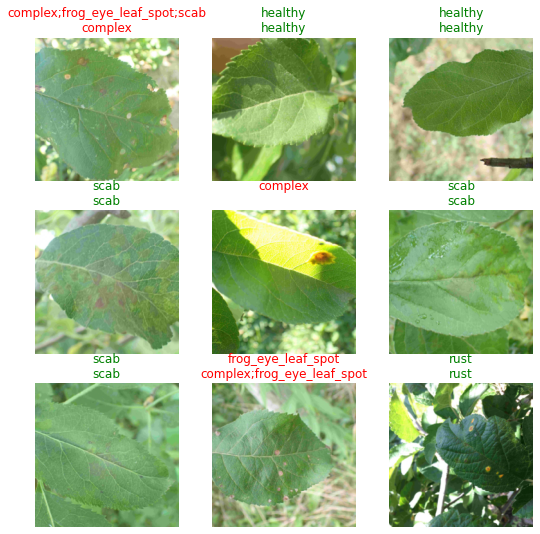

In [19]:
learn.show_results()

In [20]:
learn.dls.vocab

['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']

In [21]:
# prévision pour la 1ère image du testing set
learn.predict(path+'test_images/85f8cb619c66b863.jpg')

((#1) ['scab'],
 tensor([False, False, False, False, False,  True]),
 tensor([3.4006e-02, 1.9555e-02, 6.1746e-04, 5.1043e-04, 1.5130e-03, 9.7116e-01]))

In [22]:
# prévision pour la 2ème image du testing set
learn.predict(path+'test_images/ad8770db05586b59.jpg')

((#3) ['complex','frog_eye_leaf_spot','scab'],
 tensor([ True,  True, False, False, False,  True]),
 tensor([5.1805e-01, 7.3047e-01, 4.8436e-05, 3.7504e-05, 6.0453e-04, 7.7761e-01]))

In [23]:
# prévision pour la 3ème image du testing set
learn.predict(path+'test_images/c7b03e718489f3ca.jpg')

((#1) ['frog_eye_leaf_spot'],
 tensor([False,  True, False, False, False, False]),
 tensor([1.1433e-02, 9.9125e-01, 8.1034e-05, 3.6079e-06, 1.1026e-03, 2.0322e-02]))

In [24]:
# prévision pour les 3 images à la fois  du testing set
test_dl = dls.test_dl(get_image_files(path+'test_images')
                          .sorted())
                                                   
preds= learn.get_preds(dl=test_dl)

In [25]:
preds[0].numpy()

array([[3.4006160e-02, 1.9555086e-02, 6.1745662e-04, 5.1043282e-04,
        1.5129643e-03, 9.7115886e-01],
       [5.1805437e-01, 7.3046976e-01, 4.8435537e-05, 3.7504167e-05,
        6.0453132e-04, 7.7760881e-01],
       [1.1432785e-02, 9.9124956e-01, 8.1034377e-05, 3.6078518e-06,
        1.1025744e-03, 2.0322278e-02]], dtype=float32)

In [26]:
preds_round= preds[0].round()
preds_round

tensor([[0., 0., 0., 0., 0., 1.],
        [1., 1., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0.]])

In [27]:
df_test=pd.DataFrame(preds_round, columns=['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab'])
df_test

,complex,frog_eye_leaf_spot,healthy,powdery_mildew,rust,scab
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
SUB_PATH = path+"sample_submission.csv"
test_data = pd.read_csv(SUB_PATH)
test_data

,image,labels
0,85f8cb619c66b863.jpg,healthy
1,ad8770db05586b59.jpg,healthy
2,c7b03e718489f3ca.jpg,healthy


In [29]:
# prévision pour les 3 images à la fois  du testing set

df_test['labels'] = df_test['healthy'].apply(lambda x:'healthy ' if x==1 else "") \
                        + df_test['scab'].apply(lambda x:'scab ' if x==1 else "") \
                        +  df_test['rust'].apply(lambda x:'rust ' if x==1 else "")  \
                          +   df_test['powdery_mildew'].apply(lambda x:'powdery_mildew ' if x==1 else "")  \
                          + df_test['frog_eye_leaf_spot'].apply(lambda x:'frog_eye_leaf_spot ' if x==1 else "") \
                         + df_test['complex'].apply(lambda x:'complex ' if x==1 else "") 
                                                                  
df_test['labels']= df_test['labels'].str.strip()
df_test['labels'] = df_test['labels'].apply(lambda x:'healthy' if x=="" else x)
test_data['labels']= df_test['labels']
print(test_data)

                  image                           labels
0  85f8cb619c66b863.jpg                             scab
1  ad8770db05586b59.jpg  scab frog_eye_leaf_spot complex
2  c7b03e718489f3ca.jpg               frog_eye_leaf_spot


In [30]:
# submitting to kaggle competition
test_data.to_csv('submission.csv',index=False)

,target,predicted,probabilities,loss
0,complex,scab,"tensor([1.2859e-03, 1.2806e-03, 1.2036e-05, 3.2131e-06, 2.8023e-05, 9.9844e-01])",2.186706304550171
1,scab,healthy,"tensor([9.4453e-05, 2.3019e-03, 9.9581e-01, 1.0089e-04, 1.1301e-04, 2.9918e-03])",1.88141667842865
2,complex,scab,"tensor([8.6763e-03, 6.6029e-03, 4.8653e-06, 2.7521e-06, 5.6810e-05, 9.9764e-01])",1.800155520439148
3,complex;frog_eye_leaf_spot;scab,scab,"tensor([6.6087e-03, 5.0181e-03, 7.1491e-04, 2.1292e-03, 7.5221e-04, 9.8501e-01])",1.7221287488937378
4,complex,frog_eye_leaf_spot,"tensor([5.2898e-03, 9.9348e-01, 2.7023e-04, 4.9794e-06, 4.0792e-04, 2.0301e-02])",1.7160323858261108
5,scab,powdery_mildew,"tensor([5.8114e-03, 1.5172e-03, 4.5103e-03, 9.9443e-01, 8.0739e-04, 1.0855e-02])",1.6211236715316772
6,scab,healthy,"tensor([0.0014, 0.0066, 0.9785, 0.0035, 0.0018, 0.0042])",1.554193377494812
7,complex,rust,"tensor([4.8241e-02, 2.7425e-02, 7.6086e-06, 1.5172e-05, 9.9800e-01, 4.8813e-04])",1.5459803342819214
8,healthy,powdery_mildew,"tensor([7.3115e-03, 3.0961e-04, 1.3359e-02, 9.9165e-01, 4.6425e-05, 2.2351e-03])",1.5184940099716187


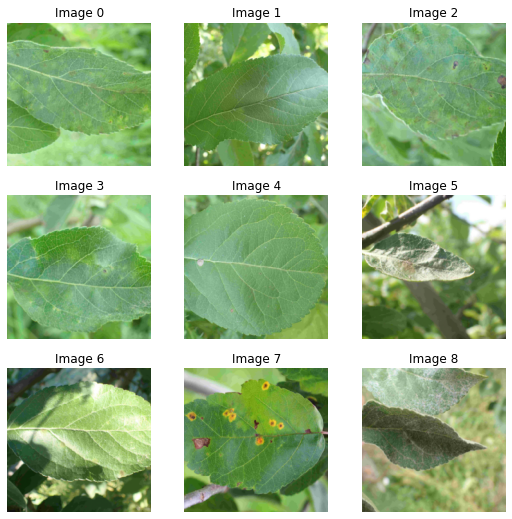

In [31]:
# les 9 plus mauvaises prédictions 
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)